In [ ]:
pip install requests pandas numpy tensorflow scikit-learn matplotlib


In [ ]:
pip install pandas numpy scikit-learn matplotlib

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving seoul_housing.csv to seoul_housing.csv


RMSE: 22086.875403165308
R^2: -2.6246335769432036


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


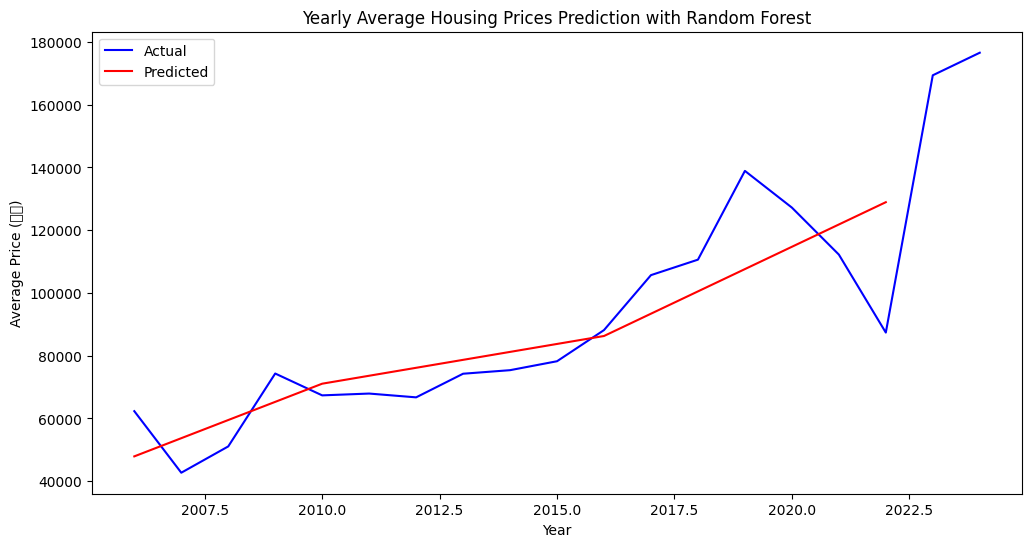

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


file_path = 'seoul_housing.csv'
df = pd.read_csv(file_path, encoding='euc-kr', low_memory=False)

df = df.dropna(subset=['건물면적(㎡)', '건축년도', '층', '물건금액(만원)', '계약일'])

df['계약연도'] = df['계약일'].apply(lambda x: int(str(x)[:4]))

yearly_avg_price = df.groupby('계약연도')['물건금액(만원)'].mean().reset_index()

X = yearly_avg_price[['계약연도']]
y = yearly_avg_price['물건금액(만원)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

plt.figure(figsize=(12, 6))
plt.plot(X['계약연도'], y, 'b-', label='Actual')
plt.plot(X_test.sort_values(by='계약연도'), y_pred[np.argsort(X_test['계약연도'])], 'r-', label='Predicted')
plt.xlabel("Year")
plt.ylabel("Average Price (만원)")
plt.title("Yearly Average Housing Prices Prediction with Random Forest")
plt.legend()
plt.show()
